In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

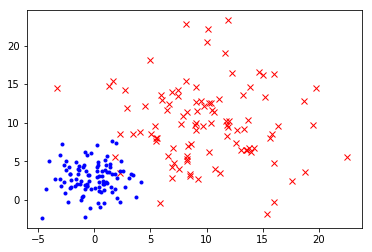

In [25]:
c1 = np.random.randn(100,2)*5.+[10,10]
c2 = np.random.randn(100,2)*2.+[0,3.]
x = np.concatenate([c1,c2]).transpose(1,0)
y = np.ones(len(c1)+len(c2))
y[len(c1):]=0
plt.plot(c1[:,0],c1[:,1],'rx')
plt.plot(c2[:,0],c2[:,1],'b.')

Text(0,0.5,'size')

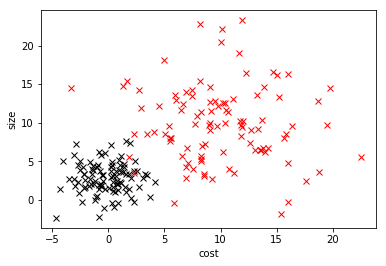

In [27]:
plt.plot(x[0,y==0],x[1,y==0],'xk')
plt.plot(x[0,y==1],x[1,y==1],'rx')
plt.xlabel('cost')
plt.ylabel('size')

Text(0,0.5,'size')

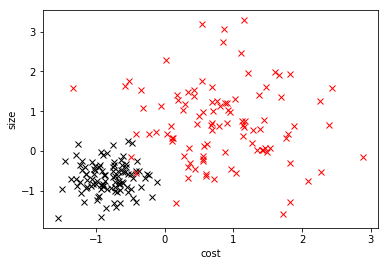

In [28]:
x = ((x.transpose(1,0)-np.mean(x,1))/np.std(x,1)).transpose(1,0)
plt.plot(x[0,y==0],x[1,y==0],'xk')
plt.plot(x[0,y==1],x[1,y==1],'rx')
plt.xlabel('cost')
plt.ylabel('size')

### Разогрев на numpy

In [29]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

def l(x1,x2,w0,w1,w2):
    return w0+w1*x1+w2*x2
def h(x1,x2,w0,w1,w2):
    return sigmoid(l(x1,x2,w0,w1,w2))

def loss(w0,w1,w2):
    return np.sum([-yy*np.log(h(xx[0],xx[1],w0,w1,w2))-(1-yy)*(1-np.log(h(xx[0],xx[1],w0,w1,w2))) for xx,yy in zip(x,y)])

Text(0,0.5,'$\\sigma(x)$')

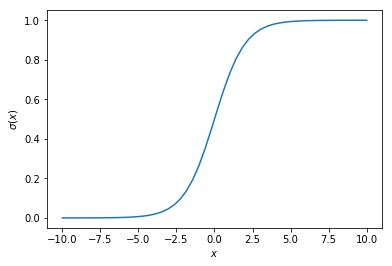

In [30]:
plt.plot((np.linspace(-10.,10)),sigmoid(np.linspace(-10.,10)))
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')

In [31]:
w0, w1,w2 = -1.,-1.,1
lr = 1e-2
path,losses = [],[]

for i in range(300):
    vl = loss(w0,w1,w2)
    if i%1==0:
        path.append([w0,w1,w2])
        losses.append(vl)
    
    losses.append(vl)
    vh = h(x[0],x[1],w0,w1,w2)
    dldw0 = np.sum((vh-y))
    dldw1 = np.sum((vh-y)*x[0])
    dldw2 = np.sum((vh-y)*x[1])
    w0-=lr*dldw0
    w1-=lr*dldw1
    w2-=lr*dldw2

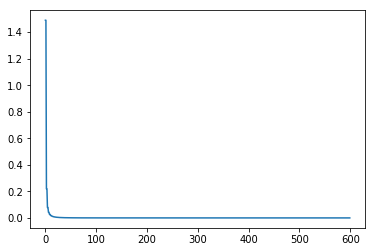

In [32]:
plt.plot(losses)

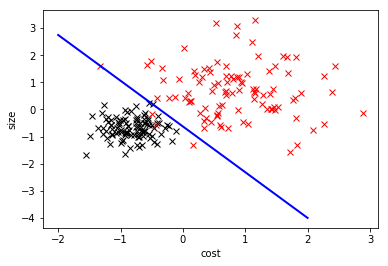

In [33]:
plt.plot(x[0,y==0],x[1,y==0],'xk')
plt.plot(x[0,y==1],x[1,y==1],'rx')
plt.xlabel('cost')
plt.ylabel('size')
def get_x2(x1,w0,w1,w2):
    return -(w1*x1+w0)/w2

x1 = np.linspace(-2,2)
plt.plot(x1, get_x2(x1,w0,w1,w2), color='b', linestyle='-', linewidth=2)

Using PYTORCH

In [219]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [220]:
ys = np.array([[a] for a in y])

In [221]:
x_train = torch.from_numpy(x.transpose(1,0)).float()
y_train = torch.from_numpy(ys).float()

In [222]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1)  # input 2 and output is 1 dimension

    def forward(self, x):
        out = F.sigmoid(self.linear(x))
        return out
    
#Граф выичслений
model = LinearRegression()
#Функция потерь
criterion = nn.BCELoss()
#Оптимизатор
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [223]:
num_epochs = 3000
losses = []
for epoch in range(num_epochs):
    # forward
    out = model(x_train)
    loss = criterion(out, y_train)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 1000 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.item()))

Epoch[1000/3000], loss: 0.021821
Epoch[2000/3000], loss: 0.014588
Epoch[3000/3000], loss: 0.011835


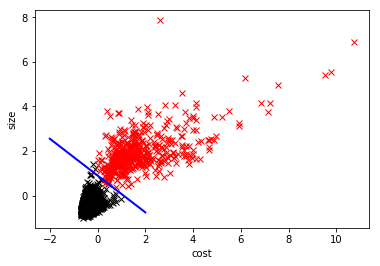

In [224]:

plt.plot(x[0,y==0],x[1,y==0],'xk')
plt.plot(x[0,y==1],x[1,y==1],'rx')
plt.xlabel('cost')
plt.ylabel('size')
def get_x2(x1,w0,w1,w2):
    return -(w1*x1+w0)/w2

x1 = np.linspace(-2,2)
w0=model.linear.bias.item()
w1 = model.linear.weight[0,0].item()
w2 = model.linear.weight[0,1].item()
plt.plot(x1, get_x2(x1,w0,w1,w2), color='b', linestyle='-', linewidth=2)